In [14]:
%matplotlib inline
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [70]:
data = pd.read_csv("student_flow_aggregated_file.csv")

In [71]:
data.head()

,Gender,actcat,T1_Level2,T2_Level2,T3_Level2,T1_IMFIT,T2_IMFIT,T3_IMFIT,YR1,YR2,transfer,HighestLevel2,count
0,Female,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Good,Good,2-year,2-year,0,Agric. & Nat. Res. Cons,1
1,Female,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Good,Good,2-year,2-year,0,Eng. Tech. & Drafting,1
2,Female,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Good,Good,2-year,2-year,0,Health Admin. & Assisting,1
3,Female,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Moderate,Moderate,4-year,4-year,0,"Commun, Fam., & Personal Svcs",1
4,Female,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Moderate,Moderate,4-year,4-year,0,Education,1


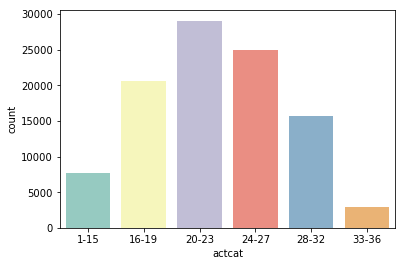

In [66]:
_ = sns.countplot(data.actcat, palette='Set3')

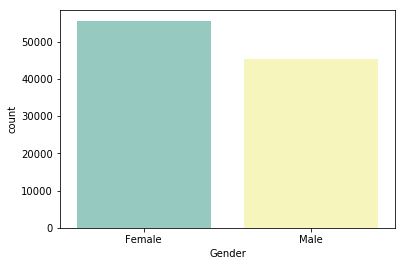

In [67]:
_ = sns.countplot(data.Gender, palette='Set3')

In [72]:
data[u'Gender'] = data.Gender.map({'Male': 0, 'Female': 1})
data[u'YR1'] = data.YR1.map({'2-year': 0, '4-year': 1})
data[u'YR2'] = data.YR2.map({'2-year': 0, '4-year': 1})

In [73]:
data.head()

,Gender,actcat,T1_Level2,T2_Level2,T3_Level2,T1_IMFIT,T2_IMFIT,T3_IMFIT,YR1,YR2,transfer,HighestLevel2,count
0,1,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Good,Good,0,0,0,Agric. & Nat. Res. Cons,1
1,1,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Good,Good,0,0,0,Eng. Tech. & Drafting,1
2,1,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Good,Good,0,0,0,Health Admin. & Assisting,1
3,1,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Moderate,Moderate,1,1,0,"Commun, Fam., & Personal Svcs",1
4,1,1-15,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Agric. & Nat. Res. Cons,Good,Moderate,Moderate,1,1,0,Education,1


In [74]:
data.isnull().values.any()

False

In [77]:
act_cat = data.actcat.unique()
majors = data.T1_Level2.unique()
mood = data.T1_IMFIT.unique()

In [76]:
print(act_cat, majors, mood)

(array(['1-15', '16-19', '20-23', '24-27', '28-32', '33-36'], dtype=object), array(['Agric. & Nat. Res. Cons', 'Architecture',
       'Area, Eth. & Multidiscip. Studies', 'Arts: Visual & Performing',
       'Business', 'Commun, Fam., & Personal Svcs', 'Communications',
       'Comp. Sci. & Mathematics', 'Education', 'Eng. Tech. & Drafting',
       'Engineering', 'English & Foreign Lang.',
       'Health Admin. & Assisting', 'Health Sci. & Techno.',
       'Philosophy, Religion, & Theology',
       'Repair, Production, & Construction',
       'Sciences: Biological & Physical', 'Social Sciences & Law'], dtype=object), array(['Good', 'Moderate', 'Poor'], dtype=object), array([0, 1]))
